# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:

fifa["ValueNumeric"]=fifa.Value.apply(lambda x: x[1:-1])
fifa["ValueNumeric"]=pd.to_numeric(fifa["ValueNumeric"])


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [23]:
fifa.ValueNumeric.shape

(18207,)

In [42]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
fifa=fifa.rename(columns={"Preferred Foot" : "PreferredF"})

cw_lm=ols('ValueNumeric ~ C(Position) *C(PreferredF)', data=fifa).fit() #Specify C for Categorical
sm.stats.anova_lm(cw_lm, typ=2)


,sum_sq,df,F,PR(>F)
C(Position),8.971195e+06,26.0,4.119870,9.014436e-12
C(PreferredF),6.410584e+04,1.0,0.765428,3.816470e-01
C(Position):C(PreferredF),3.108961e+06,26.0,1.427738,7.310256e-02
Residual,1.495218e+09,17853.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:

So, if the p-value for F statistics is less than our significance level, we reject the null hypothesis.

Rechazmosla hipotesis nula en Position, de que el valor F es cercano a cero, y aceptamos  para la interseccion y prefernd.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [43]:
# Your code here:
cw_lm=ols('ValueNumeric ~ C(Nationality)', data=fifa).fit() #Specify C for Categorical
sm.stats.anova_lm(cw_lm, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,3.488960e+07,214046.612829,2.584166,2.397652e-24
Residual,17792.0,1.473712e+09,82830.053601,NaN,NaN


What is your conclusion from this ANOVA?

Rechazamos la H0 , el valor de F es mayor a 0.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [60]:
# Your code here:
import numpy as np
import statsmodels.api as sm

fifa=fifa.dropna(how='any')


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [62]:
# Your code here:

X=fifa[["Stamina","SprintSpeed"]]
Y=fifa["ValueNumeric"]
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.603
Date:                Wed, 08 Jul 2020   Prob (F-statistic):             0.0100
Time:                        17:13:06   Log-Likelihood:            -1.2694e+05
No. Observations:               17907   AIC:                         2.539e+05
Df Residuals:                   17904   BIC:                         2.539e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         282.3958     10.411     27.126      0.000     261.990     302.802
Stamina        -0.5233      0.174     -3.012      0.003      -0.864      -0.183
SprintSpeed     0.2967      0.188      1.575      0.115      -0.073       0.666
==============================================================================
Omnibus:                     2098.070   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2257.068
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       2.412   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:

R es casi a 0, la correlacion existente entre las variable sobre la prediccion es practicamente nula.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [65]:
# Your code here:
X=fifa["Potential"]
Y=fifa["ValueNumeric"]
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1066.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          3.89e-227
Time:                        17:35:05   Log-Likelihood:            -1.2643e+05
No. Observations:               17907   AIC:                         2.529e+05
Df Residuals:                   17905   BIC:                         2.529e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1067.9234     24.577     43.452      0.000    1019.750    1116.097
Potential    -11.2063      0.343    -32.647      0.000     -11.879     -10.534
==============================================================================
Omnibus:                     2018.581   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2750.605
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       2.781   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Your conclusions here:

La correlación entre los valores predichos sobre la potencia tiene una correlacion de 0.05 fit el modelo de regresion , 

p-value is less than the significance level, your sample data provide sufficient evidence to conclude that your regression model fits the data better than the model with no independent variables.

#### Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

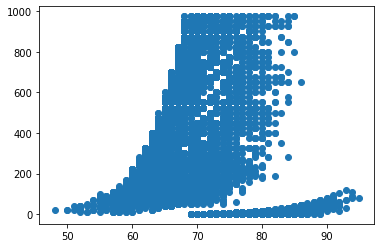

In [67]:
# Your code here:
import matplotlib.pyplot as plt
x=fifa["Potential"]
y=fifa["ValueNumeric"]
plt.scatter(x,y)


### No hay relacion lineal
